In [56]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

#sns.set(context='notebook', style='whitegrid', font_scale=1.2)

### Exploring Interactions

#### In our first model, there seemed to be a slight advantage for polynomial transformation, but we couldn't be too sure as it varied between the validation and test sets. Let's explore the interactions between variables and see if we can selectively create a polynomial transformation for a few features.

In [130]:
interaction_df = pd.read_pickle('linear_df.pickle')

In [131]:
interaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Title                                847 non-null    object
 1   Foreign_Gross                        847 non-null    int64 
 2   domestic_opening_gross               847 non-null    int64 
 3   foreign_market_count                 847 non-null    int64 
 4   Years_Since_Release                  847 non-null    int64 
 5   Is_Adaptation                        847 non-null    int64 
 6   Is_Sequel                            847 non-null    int64 
 7   Sony Pictures Entertainment (SPE)    847 non-null    int64 
 8   Twentieth Century Fox                847 non-null    int64 
 9   Universal Pictures                   847 non-null    int64 
 10  Walt Disney Studios Motion Pictures  847 non-null    int64 
 11  Warner Bros.                         847 non-

In [132]:
interaction_df.corr()

,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13
Foreign_Gross,1.000000,0.741134,0.200969,-0.226072,0.053003,0.302374,-0.044904,0.017229,-0.045664,0.240088,0.030799,0.187165,0.174697,-0.249170,0.014437,0.049526,0.129834
domestic_opening_gross,0.741134,1.000000,0.129122,-0.155889,0.000918,0.320777,-0.051730,-0.054074,-0.017581,0.271670,0.030957,0.240134,0.058538,-0.189796,0.010263,-0.035404,0.180062
foreign_market_count,0.200969,0.129122,1.000000,-0.312221,0.037741,0.080565,0.231652,0.165926,0.048794,-0.096884,-0.192674,0.114210,0.049722,-0.110217,-0.021929,0.073154,0.061911
Years_Since_Release,-0.226072,-0.155889,-0.312221,1.000000,0.016907,-0.102374,-0.008026,-0.007264,-0.029509,-0.059140,-0.041499,-0.100961,-0.052482,0.170517,0.033677,-0.031357,0.026330
Is_Adaptation,0.053003,0.000918,0.037741,0.016907,1.000000,0.007688,-0.019312,0.037104,-0.069842,-0.021884,0.022761,0.006418,0.118965,-0.098866,-0.019956,0.097004,-0.001212
Is_Sequel,0.302374,0.320777,0.080565,-0.102374,0.007688,1.000000,-0.008986,0.056302,-0.008189,0.003763,-0.029455,0.234617,0.025255,-0.147901,0.019460,-0.011771,0.061910
Sony Pictures Entertainment (SPE),-0.044904,-0.051730,0.231652,-0.008026,-0.019312,-0.008986,1.000000,-0.151900,-0.151900,-0.148219,-0.169805,0.028562,-0.028745,0.011918,-0.049959,0.017465,0.055706
Twentieth Century Fox,0.017229,-0.054074,0.165926,-0.007264,0.037104,0.056302,-0.151900,1.000000,-0.166667,-0.162628,-0.186312,0.018384,0.109152,-0.052206,0.021926,0.100154,-0.009641
Universal Pictures,-0.045664,-0.017581,0.048794,-0.029509,-0.069842,-0.008189,-0.151900,-0.166667,1.000000,-0.162628,-0.186312,-0.015481,-0.099229,0.103107,-0.029235,-0.088901,0.017354
Walt Disney Studios Motion Pictures,0.240088,0.271670,-0.096884,-0.059140,-0.021884,0.003763,-0.148219,-0.162628,-0.162628,1.000000,-0.181797,-0.020690,0.189987,-0.073458,0.206881,0.239926,-0.074805


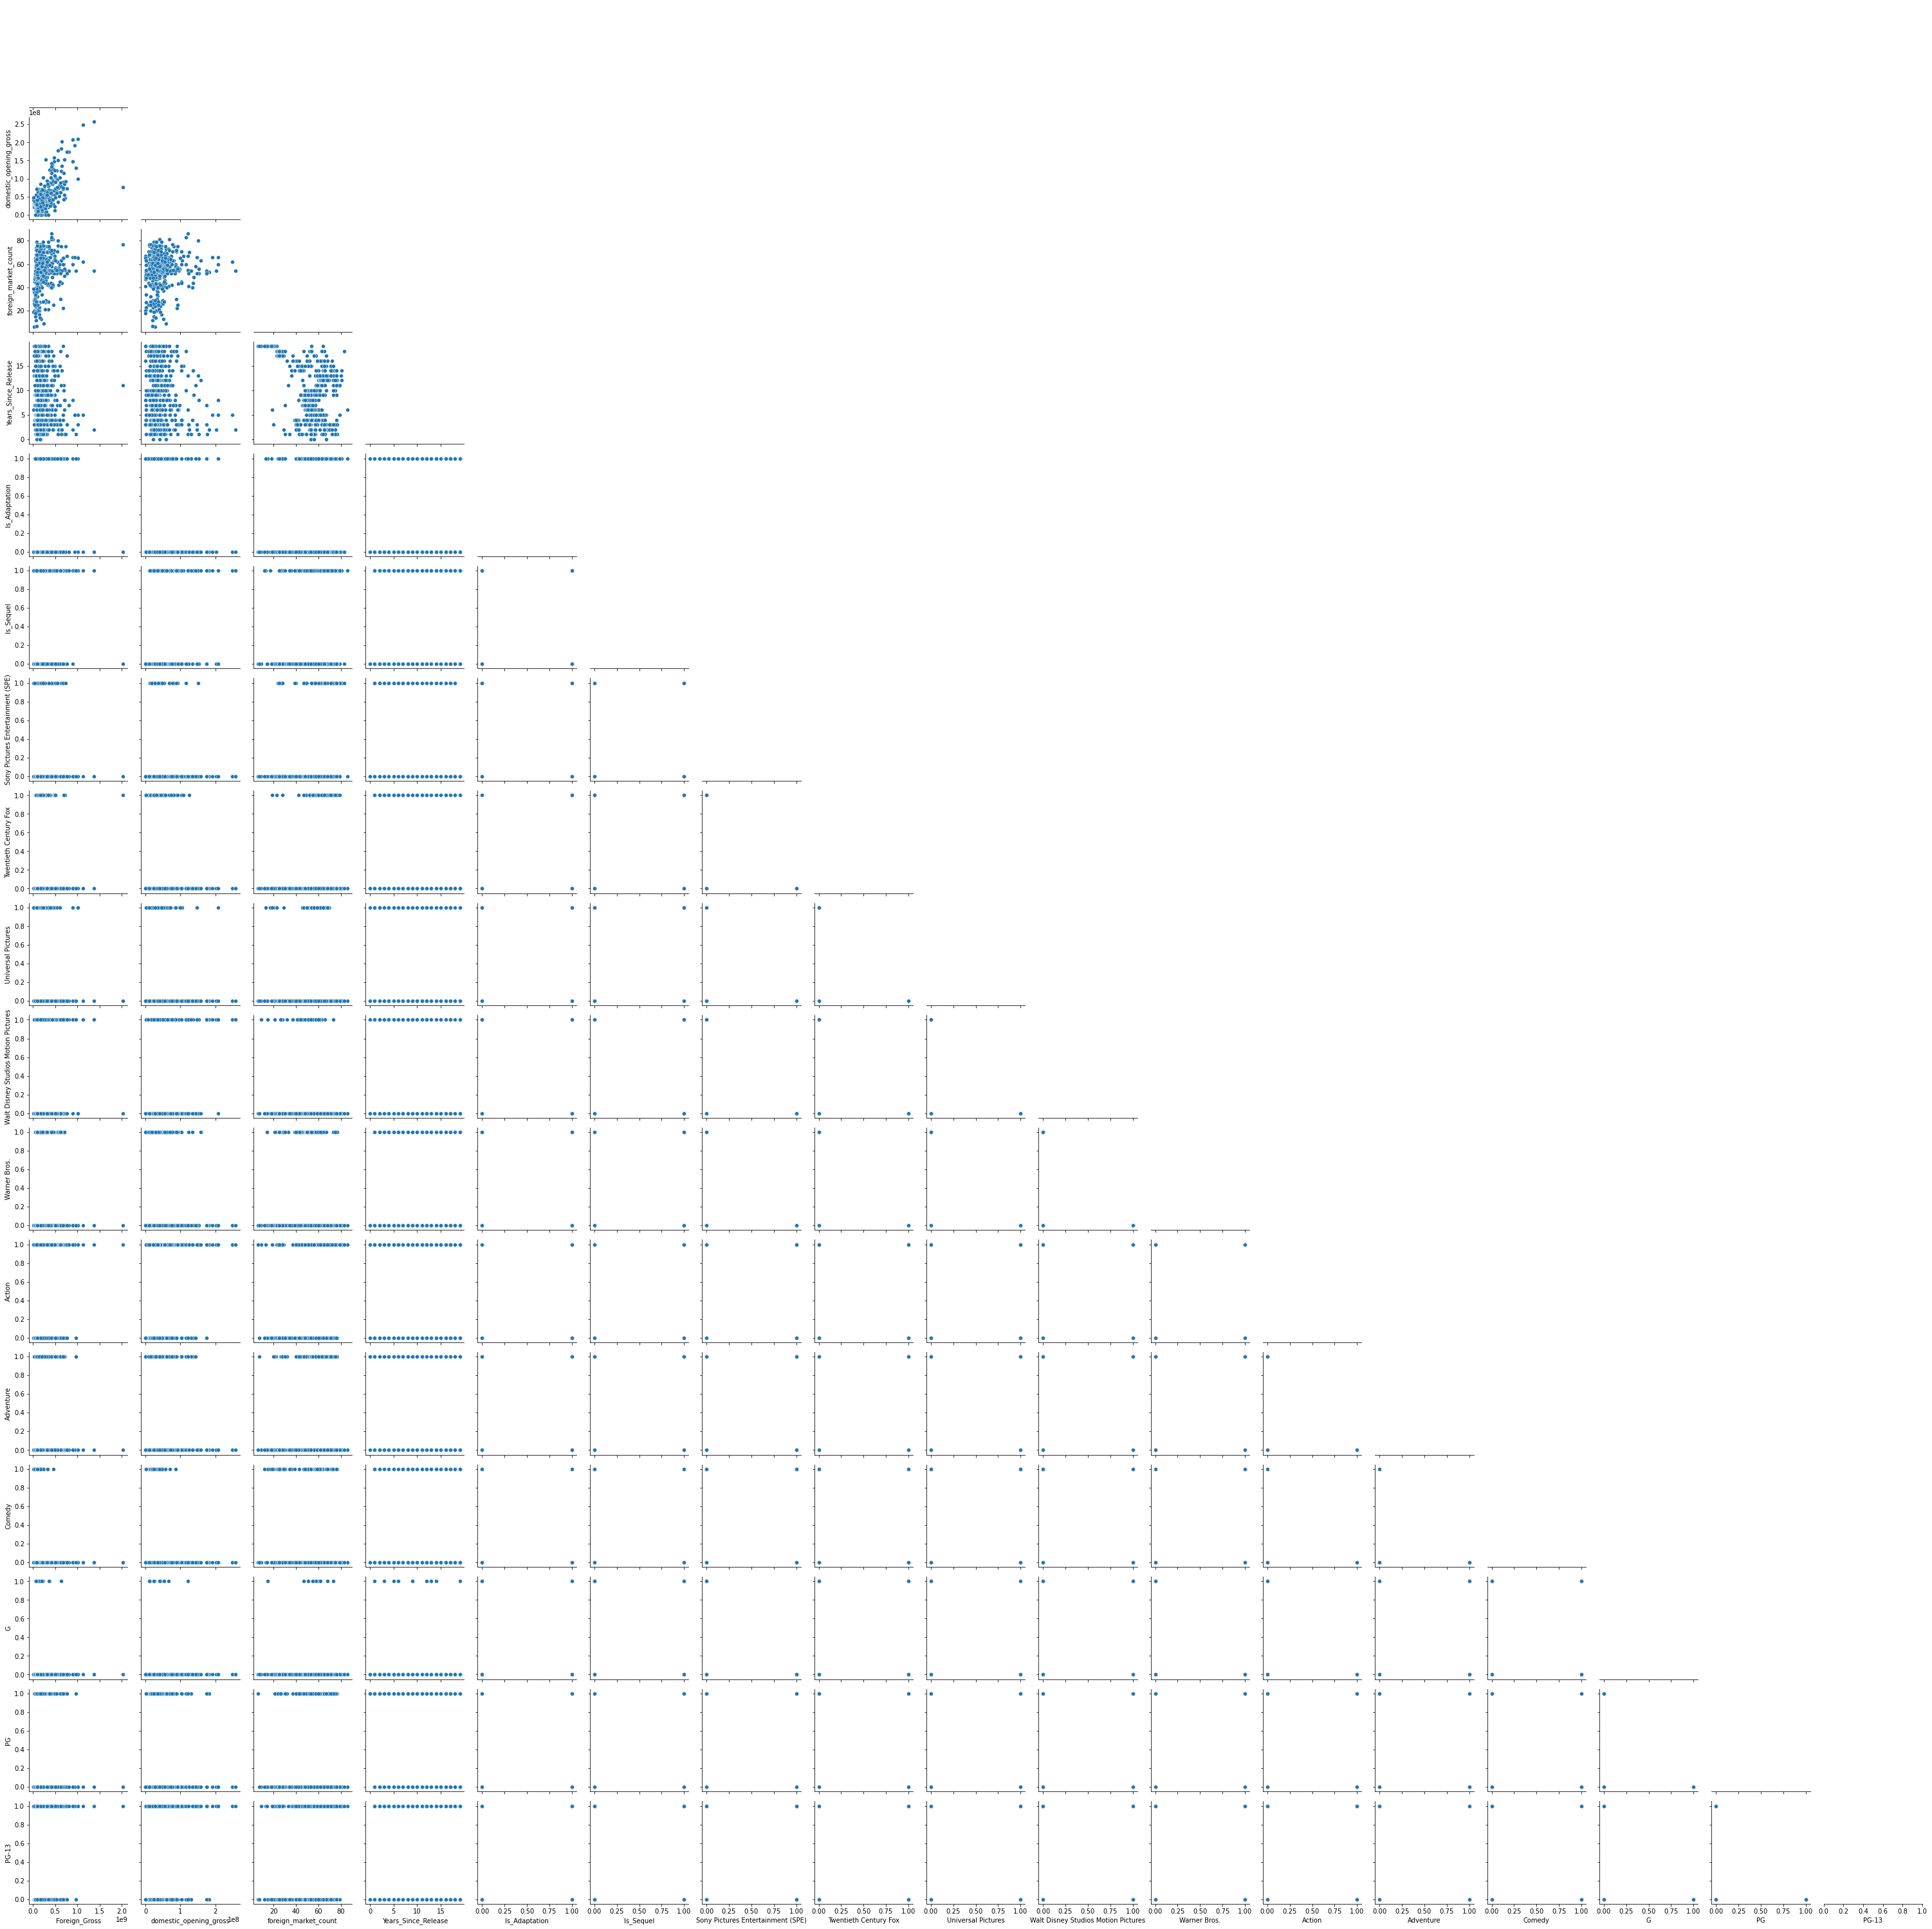

In [9]:
%config InlineBackend.figure_formats = ['png']

g = sns.PairGrid(interaction_df.sample(frac=0.6), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

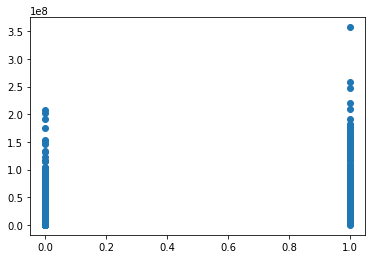

In [133]:
plt.scatter(interaction_df['Is_Sequel'], interaction_df['domestic_opening_gross']);
#definitely seeing a relationship here

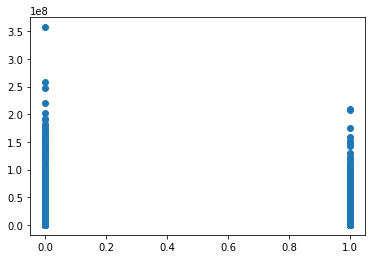

In [13]:
plt.scatter(interaction_df['Is_Adaptation'], interaction_df['domestic_opening_gross']);
#seeing relationship here too

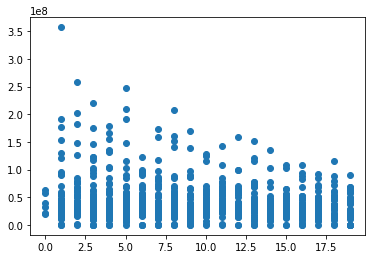

In [134]:
plt.scatter(interaction_df['Years_Since_Release'], interaction_df['domestic_opening_gross']);
#could be slightly inverse exponential?

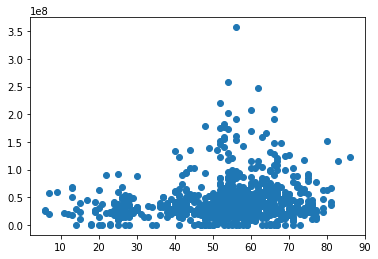

In [135]:
plt.scatter(interaction_df['foreign_market_count'], interaction_df['domestic_opening_gross']);


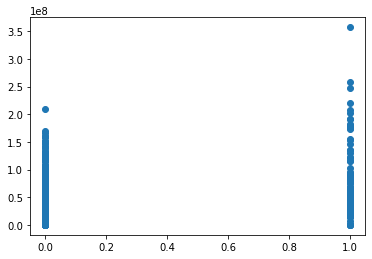

In [136]:
plt.scatter(interaction_df['Walt Disney Studios Motion Pictures'], interaction_df['domestic_opening_gross']);
#seeing relationship here


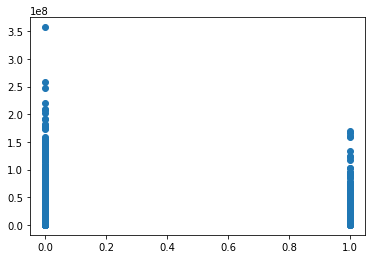

In [137]:
plt.scatter(interaction_df['Warner Bros.'], interaction_df['domestic_opening_gross']);
#seeing relationship here, inverse to Disney above. Same for all other distributors below. 
#Seems like disney is a positive impact on domestic gross


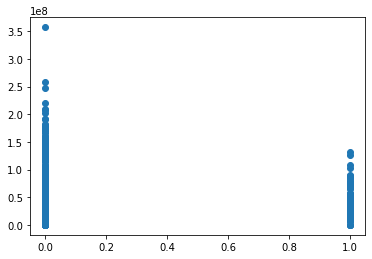

In [138]:
plt.scatter(interaction_df['Twentieth Century Fox'], interaction_df['domestic_opening_gross']);


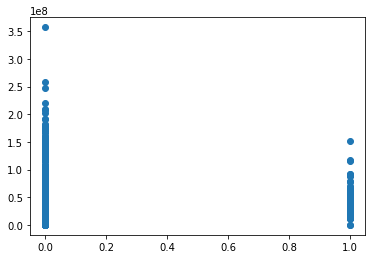

In [139]:
plt.scatter(interaction_df['Sony Pictures Entertainment (SPE)'], interaction_df['domestic_opening_gross']);


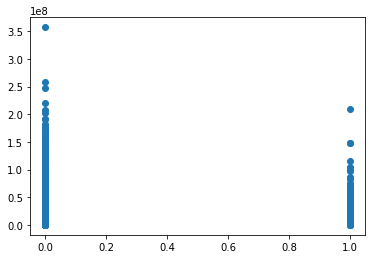

In [140]:
plt.scatter(interaction_df['Universal Pictures'], interaction_df['domestic_opening_gross']);


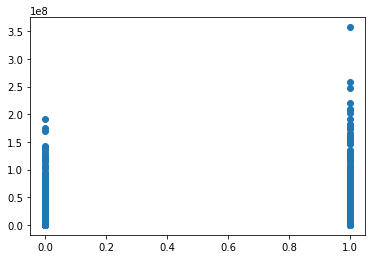

In [141]:
plt.scatter(interaction_df['Action'], interaction_df['domestic_opening_gross']);
#definitely seeing a relationship here

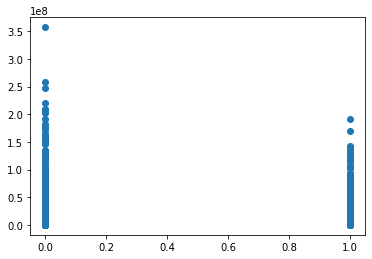

In [22]:
plt.scatter(interaction_df['Adventure'], interaction_df['domestic_opening_gross']);


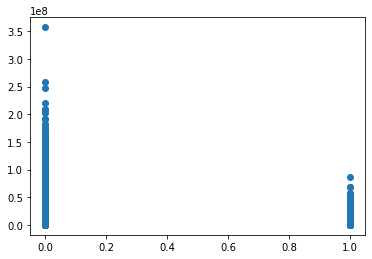

In [142]:
plt.scatter(interaction_df['Comedy'], interaction_df['domestic_opening_gross']);
#definitely seeing a relationship here

In [143]:
interaction_df['Comedy_X_Opening'] = interaction_df['Comedy']*interaction_df['domestic_opening_gross']

In [144]:
interaction_df['Action_X_Opening'] = interaction_df['Action']*interaction_df['domestic_opening_gross']

In [145]:
interaction_df['Disney_X_Opening'] = interaction_df['Walt Disney Studios Motion Pictures']*interaction_df['domestic_opening_gross']

In [146]:
interaction_df['Sequel_X_Opening'] = interaction_df['Is_Sequel']*interaction_df['domestic_opening_gross']

In [147]:
interaction_df['Adaptation_X_Opening'] = interaction_df['Is_Adaptation']*interaction_df['domestic_opening_gross']

In [148]:
interaction_df.shape

(847, 23)

In [149]:
interaction_df.head()

,Title,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,...,Adventure,Comedy,G,PG,PG-13,Comedy_X_Opening,Action_X_Opening,Disney_X_Opening,Sequel_X_Opening,Adaptation_X_Opening
0,Warcraft,391683624,24166110,66,4,0,0,0,0,1,...,0,0,0,0,1,0,24166110,0,0,0
1,Bridget Jones's Baby,187700000,8571785,61,4,0,0,0,0,1,...,0,1,0,0,0,8571785,0,0,0,0
2,xXx: Return of Xander Cage,301219864,20130142,55,3,0,1,0,0,0,...,0,0,0,0,1,0,20130142,0,20130142,0
3,The Great Wall,289393001,18469620,64,4,0,0,0,0,1,...,0,0,0,0,1,0,18469620,0,0,0
4,Mr. Bean's Holiday,198923741,9889780,68,13,0,0,0,0,1,...,0,1,1,0,0,9889780,0,0,0,0


#### Using linear regression, let's see how our data does with our manual polynomial variables

Note that we won't be using cross validation give then large number of features and our limited dataset

In [192]:
X, y = interaction_df.drop(['Foreign_Gross', 'Title'],axis=1), interaction_df['Foreign_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [193]:
#set up linear regression
lm = LinearRegression()#validate

lm.fit(X_train, y_train)
print(f'Linear Regression TRAIN R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression VAL R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression TRAIN R^2: 0.631
Linear Regression VAL R^2: 0.581


#### We're overfitting a bit here. let's see what happens if we drop some of the columns related to the ones we've built multiplicative interactions for

In [194]:
interaction_2 = interaction_df.copy()

In [195]:
interaction_2

,Title,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,...,Adventure,Comedy,G,PG,PG-13,Comedy_X_Opening,Action_X_Opening,Disney_X_Opening,Sequel_X_Opening,Adaptation_X_Opening
0,Warcraft,391683624,24166110,66,4,0,0,0,0,1,...,0,0,0,0,1,0,24166110,0,0,0
1,Bridget Jones's Baby,187700000,8571785,61,4,0,0,0,0,1,...,0,1,0,0,0,8571785,0,0,0,0
2,xXx: Return of Xander Cage,301219864,20130142,55,3,0,1,0,0,0,...,0,0,0,0,1,0,20130142,0,20130142,0
3,The Great Wall,289393001,18469620,64,4,0,0,0,0,1,...,0,0,0,0,1,0,18469620,0,0,0
4,Mr. Bean's Holiday,198923741,9889780,68,13,0,0,0,0,1,...,0,1,1,0,0,9889780,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,The Longest Yard,33347096,47606480,52,15,0,0,0,0,0,...,0,1,0,0,1,47606480,0,0,0,0
843,The Blind Side,53248834,34119372,33,11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
844,Ride Along,19530702,41516170,19,6,0,0,0,0,1,...,0,0,0,0,1,0,41516170,0,0,0
845,The Impossible,179067330,143818,47,8,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


We are only seeing a positive relationship between Disney as distributor and higher domestic opening gross.

<br> The other distributors have an similar inverse relationship, therefore, Disney as distributor may be the only relationship we need to account for in features

#### Let's delete the other distributors and see what happens.


In [196]:

del interaction_2['Sony Pictures Entertainment (SPE)']
del interaction_2['Twentieth Century Fox']
del interaction_2['Universal Pictures']
del interaction_2['Warner Bros.']
del interaction_2['Adventure']

In [197]:
X, y = interaction_2.drop(['Foreign_Gross', 'Title'],axis=1), interaction_2['Foreign_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [198]:
#set up linear regression
lm = LinearRegression()#validate

lm.fit(X_train, y_train)
print(f'Linear Regression TRAIN R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression VAL R^2: {lm.score(X_val, y_val):.3f}')


Linear Regression TRAIN R^2: 0.617
Linear Regression VAL R^2: 0.585


Now that we've dropped a few features, we can cross validate as well!

In [205]:
def cv_results(X, y, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    '''
    
    model_cv = cross_validate(model, X, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\nBest Model Feature coefficient results:')
    for feature, coef in zip(X.columns, final_model.coef_):
        print(f'{feature + ":":<16} {coef:.2f}')

In [206]:
cv_results(X,y)

Test r2 :               Mean = 0.5684	Range = (0.3502, 0.7197)
Train/Test r2 Ratio :   Mean = 1.1739	Range = (0.8036, 1.8327)

Best Model Feature coefficient results:
domestic_opening_gross: 3.18
foreign_market_count: 893039.18
Years_Since_Release: -5323898.53
Is_Adaptation:   -15733835.43
Is_Sequel:       -561360.18
Walt Disney Studios Motion Pictures: 24761712.13
Action:          -6355268.76
Comedy:          18534262.29
G:               35601294.46
PG:              39002256.89
PG-13:           28168389.84
Comedy_X_Opening: -2.93
Action_X_Opening: -0.02
Disney_X_Opening: 0.22
Sequel_X_Opening: 0.62
Adaptation_X_Opening: 0.80
Years_Since_Release_SQRT: 16480303.88


####  This is our highest value yet!

#### We also did see a slight polynomial trend with Years_Since_Release. Will transforming that help?

In [200]:
interaction_2['Years_Since_Release_SQRT'] = np.sqrt(interaction_2['Years_Since_Release'])

In [201]:
interaction_2

,Title,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Walt Disney Studios Motion Pictures,Action,Comedy,G,PG,PG-13,Comedy_X_Opening,Action_X_Opening,Disney_X_Opening,Sequel_X_Opening,Adaptation_X_Opening,Years_Since_Release_SQRT
0,Warcraft,391683624,24166110,66,4,0,0,0,1,0,0,0,1,0,24166110,0,0,0,2.000000
1,Bridget Jones's Baby,187700000,8571785,61,4,0,0,0,0,1,0,0,0,8571785,0,0,0,0,2.000000
2,xXx: Return of Xander Cage,301219864,20130142,55,3,0,1,0,1,0,0,0,1,0,20130142,0,20130142,0,1.732051
3,The Great Wall,289393001,18469620,64,4,0,0,0,1,0,0,0,1,0,18469620,0,0,0,2.000000
4,Mr. Bean's Holiday,198923741,9889780,68,13,0,0,0,0,1,1,0,0,9889780,0,0,0,0,3.605551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,The Longest Yard,33347096,47606480,52,15,0,0,0,0,1,0,0,1,47606480,0,0,0,0,3.872983
843,The Blind Side,53248834,34119372,33,11,0,0,0,0,0,0,0,1,0,0,0,0,0,3.316625
844,Ride Along,19530702,41516170,19,6,0,0,0,1,0,0,0,1,0,41516170,0,0,0,2.449490
845,The Impossible,179067330,143818,47,8,0,0,0,0,0,0,0,1,0,0,0,0,0,2.828427


In [202]:
X, y = interaction_2.drop(['Foreign_Gross', 'Title'],axis=1), interaction_2['Foreign_Gross']
#split all data into X and y (for train+validate) and X and y test
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)
#split the train+validate--X and y again into separate train and validate buckets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [203]:
cv_results(X, y)

Test r2 :               Mean = 0.5684	Range = (0.3502, 0.7197)
Train/Test r2 Ratio :   Mean = 1.1739	Range = (0.8036, 1.8327)

Best Model Feature coefficient results:
domestic_opening_gross: 3.18
foreign_market_count: 893039.18
Years_Since_Release: -5323898.53
Is_Adaptation:   -15733835.43
Is_Sequel:       -561360.18
Walt Disney Studios Motion Pictures: 24761712.13
Action:          -6355268.76
Comedy:          18534262.29
G:               35601294.46
PG:              39002256.89
PG-13:           28168389.84
Comedy_X_Opening: -2.93
Action_X_Opening: -0.02
Disney_X_Opening: 0.22
Sequel_X_Opening: 0.62
Adaptation_X_Opening: 0.80
Years_Since_Release_SQRT: 16480303.88


#### Not really. Let's stick to our model without the 'Years_Since_Release_SQRT' feature.